logo_dantion.png

`This project is underdevelopment. Your feedback is really matter for us! 😁✌️`

We created this project to complete our study in **Bangkit 2022 led by Google, GoTo and Traveloka**

## **1. Import Dependencies**
There are several libraries that needed to be installed. If you're not install it yet, delete the hashtag

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import tensorflow_io as tfio
import pathlib

from IPython import display

from tensorflow.keras import layers
from tensorflow.keras import models

## **2. Import dataset**
You can download our dataset via this link :

<a href="https://www.kaggle.com/datasets/ahmadulfi/indonesian-words-audio-dataset" target="_blank">Kaggle: Indonesian Words Audio Dataset</a>

In [3]:
#https://www.kaggle.com/datasets/ahmadulfi/indonesian-words-audio-dataset

In [4]:
os.getcwd()

'd:\\1MPORTANT!\\BANGKIT\\CAPSTONE\\machine-learning'

Define data directory and then import the dataset

In [5]:
data_dir = 'New Data/FINAL'
parent_dir = 'd:/1MPORTANT!/BANGKIT/CAPSTONE' 
#We save our data in different parent directory, so we need to change de dir
os.chdir(parent_dir) 

Let's see what the dataset about

In [8]:
event = os.listdir(data_dir)

In [9]:
print(f"Classes : {event}")

Classes : ['BEGAL', 'KEBAKARAN', 'KECELAKAAN', 'MALING', 'PENCURI', 'RAMPOK', 'RANDOM', 'TABRAKAN']


In [10]:
def _get_numfiles(dir):
    """Get number of files in a directory"""
    count = 0
    for _, _, files in os.walk(dir):
        count += len(files)
    return count

In [12]:
print(f"Total dataset : {str(_get_numfiles(data_dir))}")
print(f"Class: {event}")

Total dataset : 2310
Class: ['BEGAL', 'KEBAKARAN', 'KECELAKAAN', 'MALING', 'PENCURI', 'RAMPOK', 'RANDOM', 'TABRAKAN']


Import the dataset, preprocess, and batch them

In [19]:
def _get_files(dir):
    '''Get all file path and convert to EagerTensor'''
    #Get .wav files directory
    filedir = os.path.join(dir,"*.wav") 

    #Returns a list of files that match the given pattern
    files = tf.io.gfile.glob(filedir) 

    #Randomly shuffles a tensor along its first dimension
    files = tf.random.shuffle(files)
    
    return files

In [20]:
def _split_data(event,data,ratio1,ratio2,ratio3):
    '''Split dataset into desired ratio'''
    #Validating ratio, in total must be 100%
    files = _get_files(data)
    if ratio1+ratio2+ratio3 == 100 :
        ratio1 = round(len(files)*ratio1/100)
        ratio2 = round(len(files)*ratio2/100)
        ratio3 = round(len(files)*ratio3/100)
        globals()[f"{event}_train"] = files[:ratio1]
        globals()[f"{event}_val"] = files[ratio1: ratio1 + ratio2]
        globals()[f"{event}_test"] = files[-ratio3:]
        splitted = [globals()[f"{event}_train"],globals()[f"{event}_val"] ,globals()[f"{event}_test"]]
    else :
        raise ValueError('Exceeding the limit ratio, the total ratio must be 100% but you got ' + str(ratio1+ratio2+ratio3) + '%')
    return splitted

In [30]:
train_raw = []
val_raw = []
test_raw = []

for e in event :
    file_dir = os.path.join(data_dir,e)
    split_train,split_val,split_test = _split_data(e,file_dir,80,10,10)
    train_raw.append(split_train)
    val_raw.append(split_val)
    test_raw.append(split_test)

In [46]:
def _append_and_shuffle(raw_list):
    '''Append and Shuffle raw list'''
    list = np.array([])
    i = 0
    while i < len(raw_list):
        list = np.append(list,raw_list[i])
        i += 1
    np.random.shuffle(list)
    return list

In [50]:
train = _append_and_shuffle(train_raw)
val = _append_and_shuffle(val_raw)
test = _append_and_shuffle(test_raw)

In [51]:
print("Number of files: ")
print(f"Train files: {len(train)} \nValidation Files: {len(val)}\nTest files: {len(test)}")

Number of files: 
Train files: 1848 
Validation Files: 231
Test files: 231


### Check File Chunks

In [109]:
import wave
import librosa
import soundfile as sf
import glob
  
def check_chunks(DIR, CORRUPT_DIR):
      files_list = glob.glob(DIR + '/**/*.wav', recursive=True)
      i = 0
  
      for filename in files_list:
  
          try:
              # get size of data chunk and add size of FMT header = 44
              with wave.open(filename, 'r') as fin:
                  header_fsize = (fin.getnframes() * fin.getnchannels() * fin.getsampwidth()) + 44
  
              # get actual filesize
              file_fsize = os.path.getsize(filename)
  
              # compare both sizes
              if header_fsize != file_fsize:
                  print("Found a file with extra chunks: ", filename)
                  print(header_fsize, file_fsize)
                  i = i + 1
  
                  new_full_filename = os.path.splitext(filename)  ## just separate out wav from name
                  new_filename = new_full_filename[0] + "_processed" + ".wav"
                  audio_in, sr = librosa.load(filename, sr=16000)
                  sf.write(new_filename, audio_in, 16000, subtype='PCM_16')
                  print('File fixed and saved as: ', new_filename)
  
                  # try to fix file and save with suffix "processed" and move original file to another folder
                  try:
                      FIXED_CHUNK_DIR = os.path.join(CORRUPT_DIR, "fixed_chunks")
                      if not os.path.isdir(FIXED_CHUNK_DIR):
                          os.mkdir(FIXED_CHUNK_DIR)
                      shutil.move(filename, FIXED_CHUNK_DIR)
                      print('Moving original file to: ', FIXED_CHUNK_DIR)
  
                  # sometimes, the original file fails to move, but the processed file is successfully created
                  except:
                      print("Original file cannot be moved, please move manually")
                      continue
  
          # in case the file isn't fixed:
          except:
              # trying to at least move it out of the correct sound file folder 
              try:
                  CORRUPT_CHUNK_DIR = os.path.join(CORRUPT_DIR, "corrupt_chunks")
                  if not os.path.isdir(CORRUPT_CHUNK_DIR):
                      os.mkdir(CORRUPT_CHUNK_DIR)
  
                  print("This file cannot be fixed:  ", filename, "\nMoving it to ", CORRUPT_CHUNK_DIR)
                  shutil.move(filename, CORRUPT_CHUNK_DIR)
                  os.remove(filename)
  
              # if the unfixed file refuses to move
              except:
                  print("This file cannot be fixed: ", filename, "\nPlease remove manually")
                  continue
  
              continue
      print("done")
      return

In [18]:
check_chunks('New Data/FINAL/','New Data')

done


## **Read Audio and Labeling**

In [52]:
def _decode_audio(audio_dir):
  '''Decode .wav Audio into Waveform Audio Tensor'''
  #Read the audio file
  audiofile = tf.io.read_file(audio_dir)
  #Decode the file into wav mono channel
  audio, sr = tf.audio.decode_wav(audiofile,desired_channels=1) 
  #Squeeze to get rid the trailing axis
  audio = tf.squeeze(audio, axis=-1)
  sr = tf.cast(sr, dtype=tf.int64)
  print(sr)
  #Resample sample rate
  audio = tfio.audio.resample(audio, rate_in = sr, rate_out = 16000)
  return audio

### ini ke bawah 👇👇👇

In [66]:
def _get_waveform_and_label(file_path):
  waveform = _decode_audio(file_path)
  label = tf.strings.split(input=file_path,sep=os.path.sep)[-2]
  return waveform, label

In [67]:
files_ds = tf.data.Dataset.from_tensor_slices(train)

waveform_ds = files_ds.map(
    map_func=_get_waveform_and_label,
    num_parallel_calls=tf.data.AUTOTUNE)

Tensor("Cast:0", shape=(), dtype=int64)


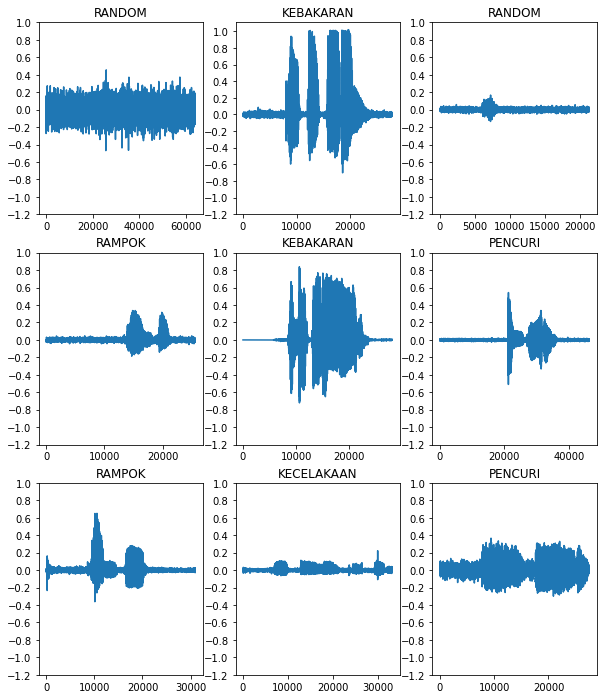

In [68]:
rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))

for i, (audio, label) in enumerate(waveform_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.plot(audio.numpy())
  ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
  label = label.numpy().decode('utf-8')
  ax.set_title(label)

plt.show()

In [72]:
def _get_spectrogram(waveform):
  # Zero-padding for an audio waveform with less than 16,000 samples.
  input_len = 16000
  waveform = waveform[:input_len]

  # Create 16k zero audio waveform as bucket
  zero_padding = tf.zeros([input_len] - tf.shape(waveform),dtype=tf.float32)

  # Cast the waveform tensors dtype to float32.
  waveform = tf.cast(waveform, dtype=tf.float32)
  equal_length = tf.concat([waveform, zero_padding], 0)

  # Convert the waveform to a spectrogram via a STFT.
  spectrogram = tf.signal.stft(equal_length, frame_length=255, frame_step=128)
    
  # Obtain the magnitude of the STFT.
  spectrogram = tf.abs(spectrogram)
  # Add a `channels` dimension, so that the spectrogram can be used
  # as image-like input data with convolution layers (which expect
  # shape (`batch_size`, `height`, `width`, `channels`).
  spectrogram = spectrogram[..., tf.newaxis]
  return spectrogram

In [74]:
for waveform, label in waveform_ds.take(1):
  label = label.numpy().decode('utf-8')
  spectrogram = _get_spectrogram(waveform)

In [75]:
def _plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1)
  # Convert the frequencies to log scale and transpose, so that the time is
  # represented on the x-axis (columns).
  # Add an epsilon to avoid taking a log of zero.
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)

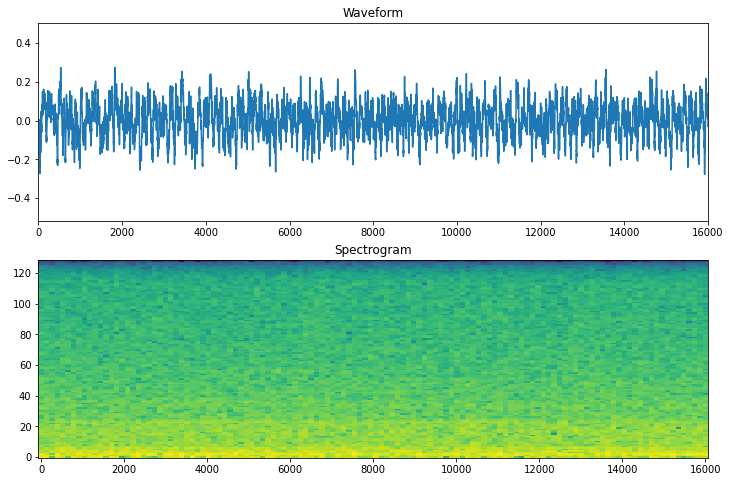

In [76]:
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 16000])

_plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()

In [82]:
def _get_spectrogram_and_label_id(audio, label):
  spectrogram = _get_spectrogram(audio)
  label_id = tf.math.argmax(label == event)
  return spectrogram, label_id

In [83]:
spectrogram_ds = waveform_ds.map(
  map_func=_get_spectrogram_and_label_id,
  num_parallel_calls=tf.data.AUTOTUNE)

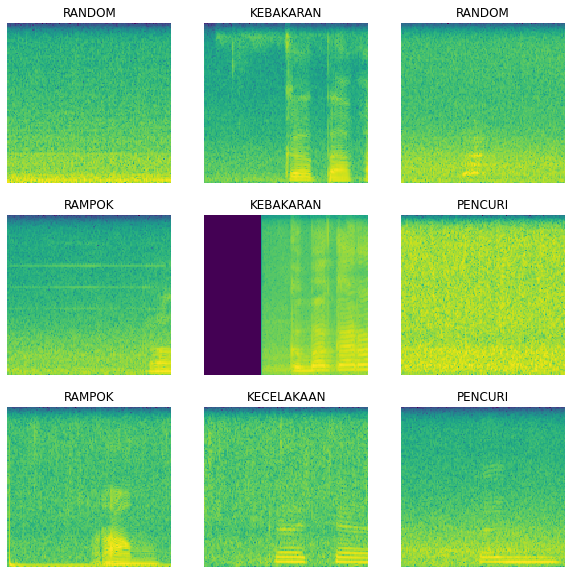

In [84]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
for i, (spectrogram, label_id) in enumerate(spectrogram_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  plot_spectrogram(spectrogram.numpy(), ax)
  ax.set_title(event[label_id.numpy()])
  ax.axis('off')

plt.show()

## Build Model

In [87]:
def preprocess_dataset(files):
  files_ds = tf.data.Dataset.from_tensor_slices(files)
  output_ds = files_ds.map(
      map_func=_get_waveform_and_label,
      num_parallel_calls=tf.data.AUTOTUNE)
  output_ds = output_ds.map(
      map_func=_get_spectrogram_and_label_id,
      num_parallel_calls=tf.data.AUTOTUNE)
  return output_ds

In [88]:
train_ds = spectrogram_ds
val_ds = preprocess_dataset(val)
test_ds = preprocess_dataset(test)

Tensor("Cast:0", shape=(), dtype=int64)
Tensor("Cast:0", shape=(), dtype=int64)


In [177]:
batch_size = 64
train_ds = train_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

In [178]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [179]:
#hyperparameter
for spectrogram, _ in spectrogram_ds.take(1):
  input_shape = spectrogram.shape
print('Input shape:', input_shape)
num_labels = len(event)

model = models.Sequential([
    Input(shape=input_shape),

    Conv2D(32, 3, activation='relu', padding='same'),
    MaxPooling2D(padding='same'),
    Conv2D(64, 3, activation='relu', padding='same'),
    MaxPooling2D(padding='same'),
    Conv2D(128, 3, activation='relu', padding='same'),
    MaxPooling2D(padding='same'),
    Dropout(0.25),
    Flatten(),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(num_labels, activation = 'softmax')])

model.summary()

Input shape: (124, 129, 1)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 124, 129, 32)      320       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 62, 65, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 62, 65, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 31, 33, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 31, 33, 128)       73856     
                                                                 
 max_pooling2d_24 (MaxPooli

In [180]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy'],
)

In [181]:
EPOCHS = 20

history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=EPOCHS,
)

Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'IteratorGetNext' defined at (most recent call last):
    File "c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 504, in dispatch_queue
      await self.process_one()
    File "c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 493, in process_one
      await dispatch(*args)
    File "c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 400, in dispatch_shell
      await result
    File "c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 724, in execute_request
      reply_content = await reply_content
    File "c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Ahmad Ulfi\AppData\Local\Temp\ipykernel_6832\1386482889.py", line 3, in <cell line: 3>
      history = model.fit(
    File "c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1009, in step_function
      data = next(iterator)
Node: 'IteratorGetNext'
Cannot batch tensors with different shapes in component 0. First element had shape [32,124,129,1] and element 1 had shape [24,124,129,1].
	 [[{{node IteratorGetNext}}]] [Op:__inference_train_function_39369]

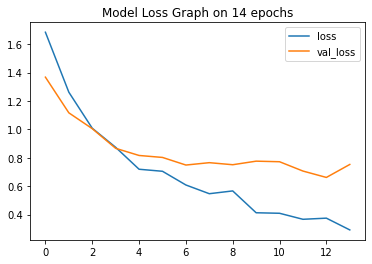

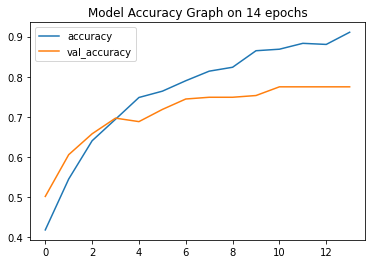

In [108]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title(f'Model Loss Graph on {len(history.epoch)} epochs')
plt.show()
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title(f'Model Accuracy Graph on {len(history.epoch)} epochs')
plt.show()

### Test Dataset

In [109]:
test_audio = []
test_labels = []

for audio, label in test_ds:
  test_audio.append(audio.numpy())
  test_labels.append(label.numpy())

test_audio = np.array(test_audio)
test_labels = np.array(test_labels)

In [110]:
y_pred = np.argmax(model.predict(test_audio), axis=1)
y_true = test_labels

test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy: {test_acc:.0%}')

Test set accuracy: 83%


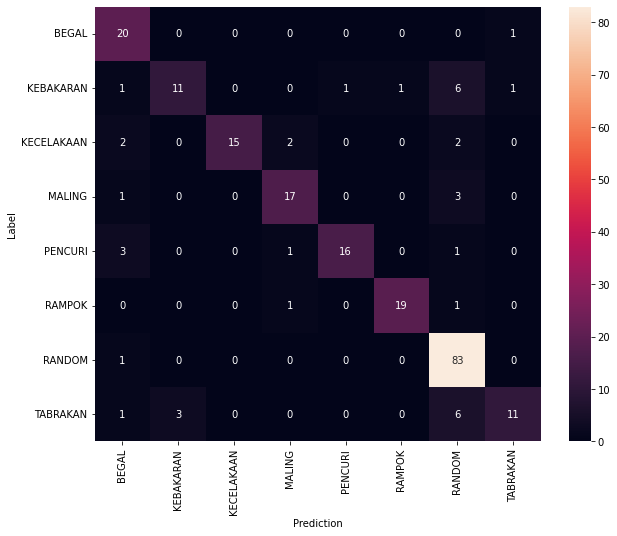

In [111]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=event,
            yticklabels=event,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

## Save the model!

In [112]:
savedir='machine-learning/final-model'

In [113]:
model.save(savedir)

INFO:tensorflow:Assets written to: machine-learning/final-model\assets


In [114]:
loadedmodel = tf.keras.models.load_model(savedir)
loadedmodel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 124, 129, 32)      320       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 65, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 62, 65, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 31, 33, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 31, 33, 64)        0         
                                                                 
 flatten_5 (Flatten)         (None, 65472)            

In [120]:
input_shape = [1,124,129]
def predicting(path):
  waveform = _decode_audio(path)
  spec = _get_spectrogram(waveform) 
  spec = tf.reshape(spec, input_shape)
  
  predict = list(loadedmodel.predict([spec])[0])
  print(f'Predict Probability : {predict}')
  
  predicted = max(predict)
  print(predicted)
  
  index = predict.index(predicted)
  predictresult = event[index]
  
  plt.figure(figsize=(12,5))
  plt.title(f"The audio {path} is predicted as {predictresult}")
  predictgraph(spec)
  display.display(display.Audio(waveform, rate=16000))

In [121]:
def predictgraph(spec):
    prediction = loadedmodel(spec)
    plt.bar(event, tf.nn.softmax(prediction[0]))
    plt.show()

tf.Tensor(44100, shape=(), dtype=int64)
Predict Probability : [0.017793722, 0.61588955, 0.362495, 1.177584e-09, 1.2150562e-07, 1.47344235e-05, 5.0450984e-07, 0.0038062674]
0.61588955


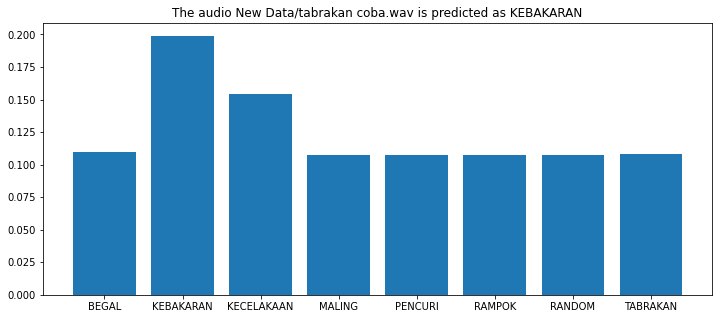

In [128]:
predicting('New Data/tabrakan coba.wav')

tf.Tensor(44100, shape=(), dtype=int64)
Predict Probability : [5.2743975e-23, 2.9857173e-18, 4.3656905e-14, 4.9882337e-16, 1.5604032e-19, 1.538409e-21, 1.0, 3.311354e-15]
1.0


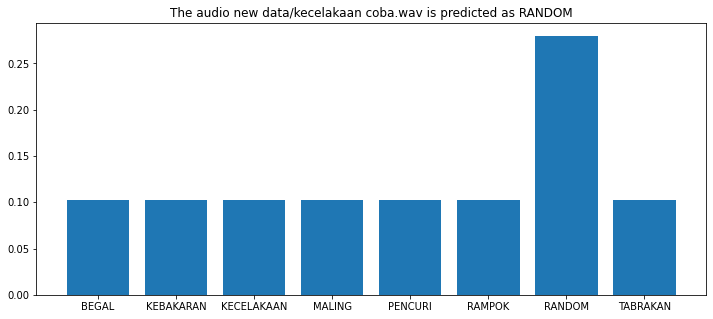

In [138]:
predicting('new data/kecelakaan coba.wav')

### **Creating TFLITE Model**

In [145]:
export_dir = 'machine-learning/final-model-tflite/'
tf.saved_model.save(model,export_dir=export_dir)

INFO:tensorflow:Assets written to: machine-learning/final-model-tflite/assets


In [146]:
# EXERCISE: Use the TFLiteConverter SavedModel API to initialize the converter

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [147]:
tflite_model_file = pathlib.Path(os.path.join('machine-learning','final-model.tflite'))
tflite_model_file.write_bytes(tflite_model)

4216968

### *Add metadata to tflite*

In [148]:
from tflite_support import flatbuffers
from tflite_support import metadata as _metadata
from tflite_support import metadata_schema_py_generated as _metadata_fb

In [159]:
model_meta = _metadata_fb.ModelMetadataT()
model_meta.name = "DANTION Audio Classification"
model_meta.description = ("Identify 7 event for emergency button "
                          "feature in DANTION app.")
model_meta.version = "v1.2"
model_meta.author = "C22-PS121 Bangkit Product Capstone Project Team"

In [160]:
input_meta = _metadata_fb.TensorMetadataT()
output_meta = _metadata_fb.TensorMetadataT()

In [161]:
input_meta.name = "wav audio"
input_meta.description = ("Input audio clip to be classified "
                          "(16 kHz float32 waveform samples in range -1.0..1.0).")
input_meta.content = _metadata_fb.ContentT()
input_meta.content.contentProperties = _metadata_fb.AudioPropertiesT()
input_meta.content.contentProperties.
input_meta.content.contentProperties.sampleRate = 16000
input_meta.content.contentProperties.channels = 1


SyntaxError: invalid syntax (1339028758.py, line 6)

In [162]:
output_meta.name = "classifier"
output_meta.description = ("Output probability for each event: "
                           "['BEGAL', 'KEBAKARAN', 'KECELAKAAN', 'MALING', 'PENCURI', 'RAMPOK', 'RANDOM', 'TABRAKAN']")

#Stats
output_meta.content = _metadata_fb.ContentT()
output_meta.content.contentProperties = _metadata_fb.FeaturePropertiesT()
output_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties
)

output_stats = _metadata_fb.StatsT()
output_stats.max= 1
output_stats.min= 0

#Crete Label File
event = ['BEGAL', 'KEBAKARAN', 'KECELAKAAN', 'MALING', 'PENCURI', 'RAMPOK', 'RANDOM', 'TABRAKAN']
pathtxt = 'machine-learning/final-model-labels-files.txt'
with open(pathtxt,'w') as labelfile:
    for item in event:
        labelfile.write("%s\n" %item)

#Add label file
label_file = _metadata_fb.AssociatedFileT()
label_file.name = os.path.basename(pathtxt)
label_file.description = "Label for audio classification that model can classify"
label_file.type = _metadata_fb.AssociatedFileType.TENSOR_AXIS_LABELS
output_meta.associatedFiles = [label_file]

In [163]:
# Creates subgraph info.
subgraph = _metadata_fb.SubGraphMetadataT()
subgraph.inputTensorMetadata = [input_meta]
subgraph.outputTensorMetadata = [output_meta]
model_meta.subgraphMetadata = [subgraph]

b = flatbuffers.Builder(0)
b.Finish(
    model_meta.Pack(b),
    _metadata.MetadataPopulator.METADATA_FILE_IDENTIFIER)
metadata_buf = b.Output()

In [164]:
populator = _metadata.MetadataPopulator.with_model_file('machine-learning/final-model.tflite')
populator.load_metadata_buffer(metadata_buf)
populator.load_associated_files([pathtxt])
populator.populate()

In [157]:
import tensorflow as tf
import numpy as np
import zipfile

interpreter = tf.lite.Interpreter('machine-learning/final-model.tflite')

input_details = interpreter.get_input_details()
waveform_input_index = input_details[0]['index']
output_details = interpreter.get_output_details()
scores_output_index = output_details[0]['index']

# Input: 0.975 seconds of silence as mono 16 kHz waveform samples.
waveform = np.zeros(int(round(0.975 * 16000)), dtype=np.float32)
print(waveform.shape)

interpreter.resize_tensor_input(waveform_input_index, [waveform.size], strict=True)
interpreter.allocate_tensors()
interpreter.set_tensor(waveform_input_index, waveform)
interpreter.invoke()
scores = interpreter.get_tensor(scores_output_index)
print(scores.shape) 

top_class_index = scores.argmax()


(15600,)


RuntimeError: tensorflow/lite/core/subgraph.cc:934 tensor->dims->size != dims.size() (4 != 1)

In [167]:
labels_file = zipfile.ZipFile('machine-learning/final-model.tflite').open('final-model-labels-files.txt')
labels = [l.decode('utf-8').strip() for l in labels_file.readlines()]
print(len(labels)) 
labels

8


['BEGAL',
 'KEBAKARAN',
 'KECELAKAAN',
 'MALING',
 'PENCURI',
 'RAMPOK',
 'RANDOM',
 'TABRAKAN']